# Infinite relational model

Clustering of binary data. For example, suppose the row is the user and the column is the purchase status of each product. Use Poisson Infinite relational model when you want to cluster products with users who have the same tendency from the user's purchase history.


In [28]:
import numpy as np
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

from irmlearn import IRM

## Prepare data

In [29]:
def prepare_data():
    np.random.seed(0)
    h_beta = [
        (5, 10),
        (2, 20),
        (17, 4),
        (20, 1),
        (10, 2),
        (2, 16),
        (22, 4),
        (8, 29),
        (5, 31),
        (11, 17),
        (41, 3),
        (6, 32),
    ]

    thetas = []
    for h in h_beta:
        theta = np.random.beta(*h, (10, 10))
        thetas.append(theta)

    temp = []
    for i in range(0, 12, 3):
        temp.append(
            np.hstack([thetas[i], thetas[i+1], thetas[i+2]])
        )
    theta_ = np.vstack(temp)

    X = stats.bernoulli.rvs(p=theta_, size=theta_.shape)
    X_ = X.copy()
    row_index = X.shape[0]
    col_index = X.shape[1]

    X = X[np.random.permutation(row_index)]
    X = X[:, np.random.permutation(col_index)]

    return X, X_

In [30]:
X, X_ = prepare_data()

Data is generated with a different probability distribution for each block.

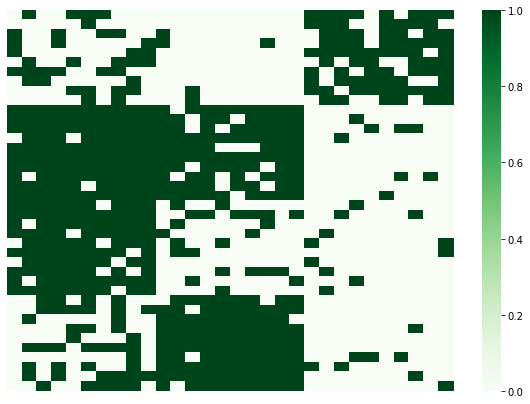

In [31]:
plt.figure(figsize=(10, 7))
sns.heatmap(X_, cmap="Greens")
plt.axis('off')
plt.show()

Shuffle rows and columns to make train data.

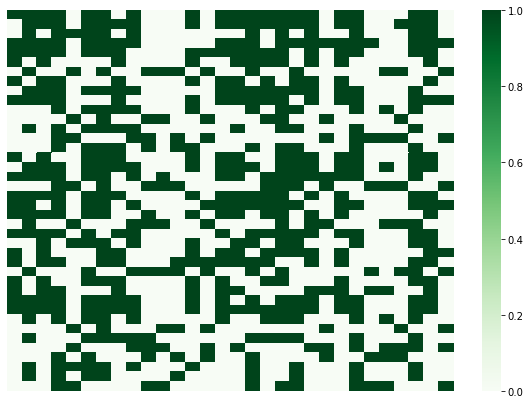

In [32]:
plt.figure(figsize=(10, 7))
sns.heatmap(X, cmap="Greens")
plt.axis('off')
plt.show()

## Traininig

In [33]:
alpha = 1.5
a = 0.1
b = 0.1
max_iter = 300

model = IRM(alpha, a, b, max_iter, verbose=True, use_best_iter=True)

In [34]:
model.fit(X)

iter=1 -- sample label deleted, n_sample_labels: 11
iter=1 -- feature label deleted, n_feature_labels: 17
iter=1 -- feature label deleted, n_feature_labels: 16
iter=1 -- feature label deleted, n_feature_labels: 15
iter=1 -- sample label deleted, n_sample_labels: 10
iter=1 -- feature label deleted, n_feature_labels: 14
iter=1 -- feature label deleted, n_feature_labels: 13
iter=1 -- sample label deleted, n_sample_labels: 9
iter=1 -- feature label deleted, n_feature_labels: 12
iter=1 -- feature label deleted, n_feature_labels: 11
iter=1 -- sample label deleted, n_sample_labels: 8
iter=1 -- feature label deleted, n_feature_labels: 10
iter=1 -- feature label deleted, n_feature_labels: 9
iter=1 -- sample label deleted, n_sample_labels: 7
iter=1 -- sample label deleted, n_sample_labels: 6
iter=1 -- New sample label created, n_sample_labels: 7
iter=1 -- sample label deleted, n_sample_labels: 6
iter=1 -- feature label deleted, n_feature_labels: 8
iter=2 -- feature label deleted, n_feature_label

IRM(a=0.1, alpha=1.5, b=0.1, max_iter=300)

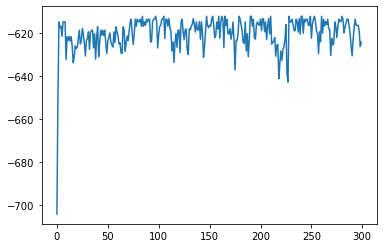

In [35]:
plt.plot(model.history_)

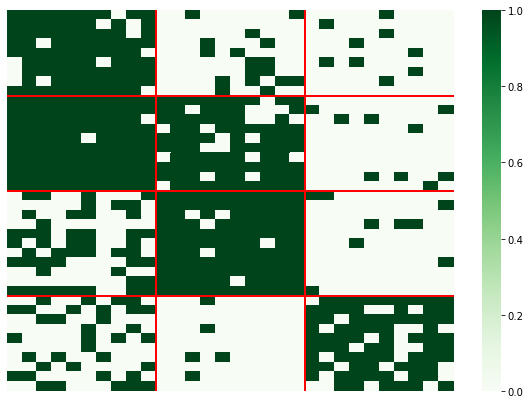

In [36]:
row_index = np.argsort(model.sample_labels_)
col_index = np.argsort(model.feature_labels_)
X__ = X[row_index, :][:, col_index]

_, hlist = np.unique(np.sort(model.sample_labels_), return_counts=True)
_, vlist = np.unique(np.sort(model.feature_labels_), return_counts=True)

hlist = np.cumsum(hlist)
vlist = np.cumsum(vlist)

plt.figure(figsize=(10, 7))
sns.heatmap(X__, cmap="Greens")
for y in hlist[:-1]:
    plt.axhline(y=y, linewidth=2, color="r")    
for x in vlist[:-1]:
    plt.axvline(x=x, linewidth=2, color="r")
plt.axis("off")
plt.show()